--- 

# <center> Project ML for Time Series 
## <center> Classification Problem

<center> Realized By: 

##### <center> Eya Ghamgui $~~$ eya.ghamgui@telecom-paris.fr
##### <center> Siwar Mhadhbi $~~$ siwar.mhadhbi@telecom-paris.fr

---

## Importations 

In [ ]:
# Import utility packages
import time
import numpy as np 
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Set visualization formats
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import plotly.offline as offline
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns 
sns.set()

# Import custom functions
from models import RF_classification, GB_classification, NN_classification
from functions import fisher_score, MIM, MIFS

# Ignore warnings output
import warnings
warnings.filterwarnings("ignore")

## Data Retrieval 

In [ ]:
# Load data
dataset = pd.read_csv('wine.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Features:
- **fixed acidity:** most acids involved with wine or fixed or nonvolatile
- **volatile acidity:** the amount of acetic acid in wine
- **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines 
- **residual sugar:** the amount of sugar remaining after fermentation stops
- **chlorides:** the amount of salt in the wine
- **free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- **total sulfur dioxide:** amount of free and bound forms of S02
- **density:** the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- **alcohol:** the percent alcohol content of the wine<br>

Target:
- **quality:** output variable (bad or good)

## Checking Missing Values

In [ ]:
MV = pd.DataFrame(dataset.isna().sum(), columns=['Number of missing values'])
MV.head(12).style.set_properties(**{'background-color': '#c6ccd8'})

,Number of missing values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Data Visualization 

### 1. Counts of Classes

In [ ]:
counts = pd.DataFrame(dataset['quality'].value_counts())
counts['color'] = '#496595'
counts['color'][-1] = '#c6ccd8'
counts['text'] = counts.index + ' - ' + counts['quality'].astype(str) 

fig = make_subplots(rows=1, cols=1,subplot_titles =['Wine Quality'])

fig.add_trace(go.Bar(x=counts.index,y=counts.quality, 
                     marker=dict(color= counts['color']),
                     text=counts['text'],textposition='auto',
                     orientation='v'), 
                     row=1, col=1)

fig.update_layout(height=500, width=600)

### 2. Correlation between features

In [ ]:
corr = dataset.corr().round(2)

fig = make_subplots(rows=1, cols=1, subplot_titles =['Correlation between features'])
fig.add_trace(go.Heatmap(x=corr.columns, y=corr.columns, z=corr,colorscale='RdBu', text= corr.to_numpy().astype('str'), texttemplate="%{text}"),row=1,col=1)

fig.update_layout(height=800, width=800)

### 3. Pair Plot 

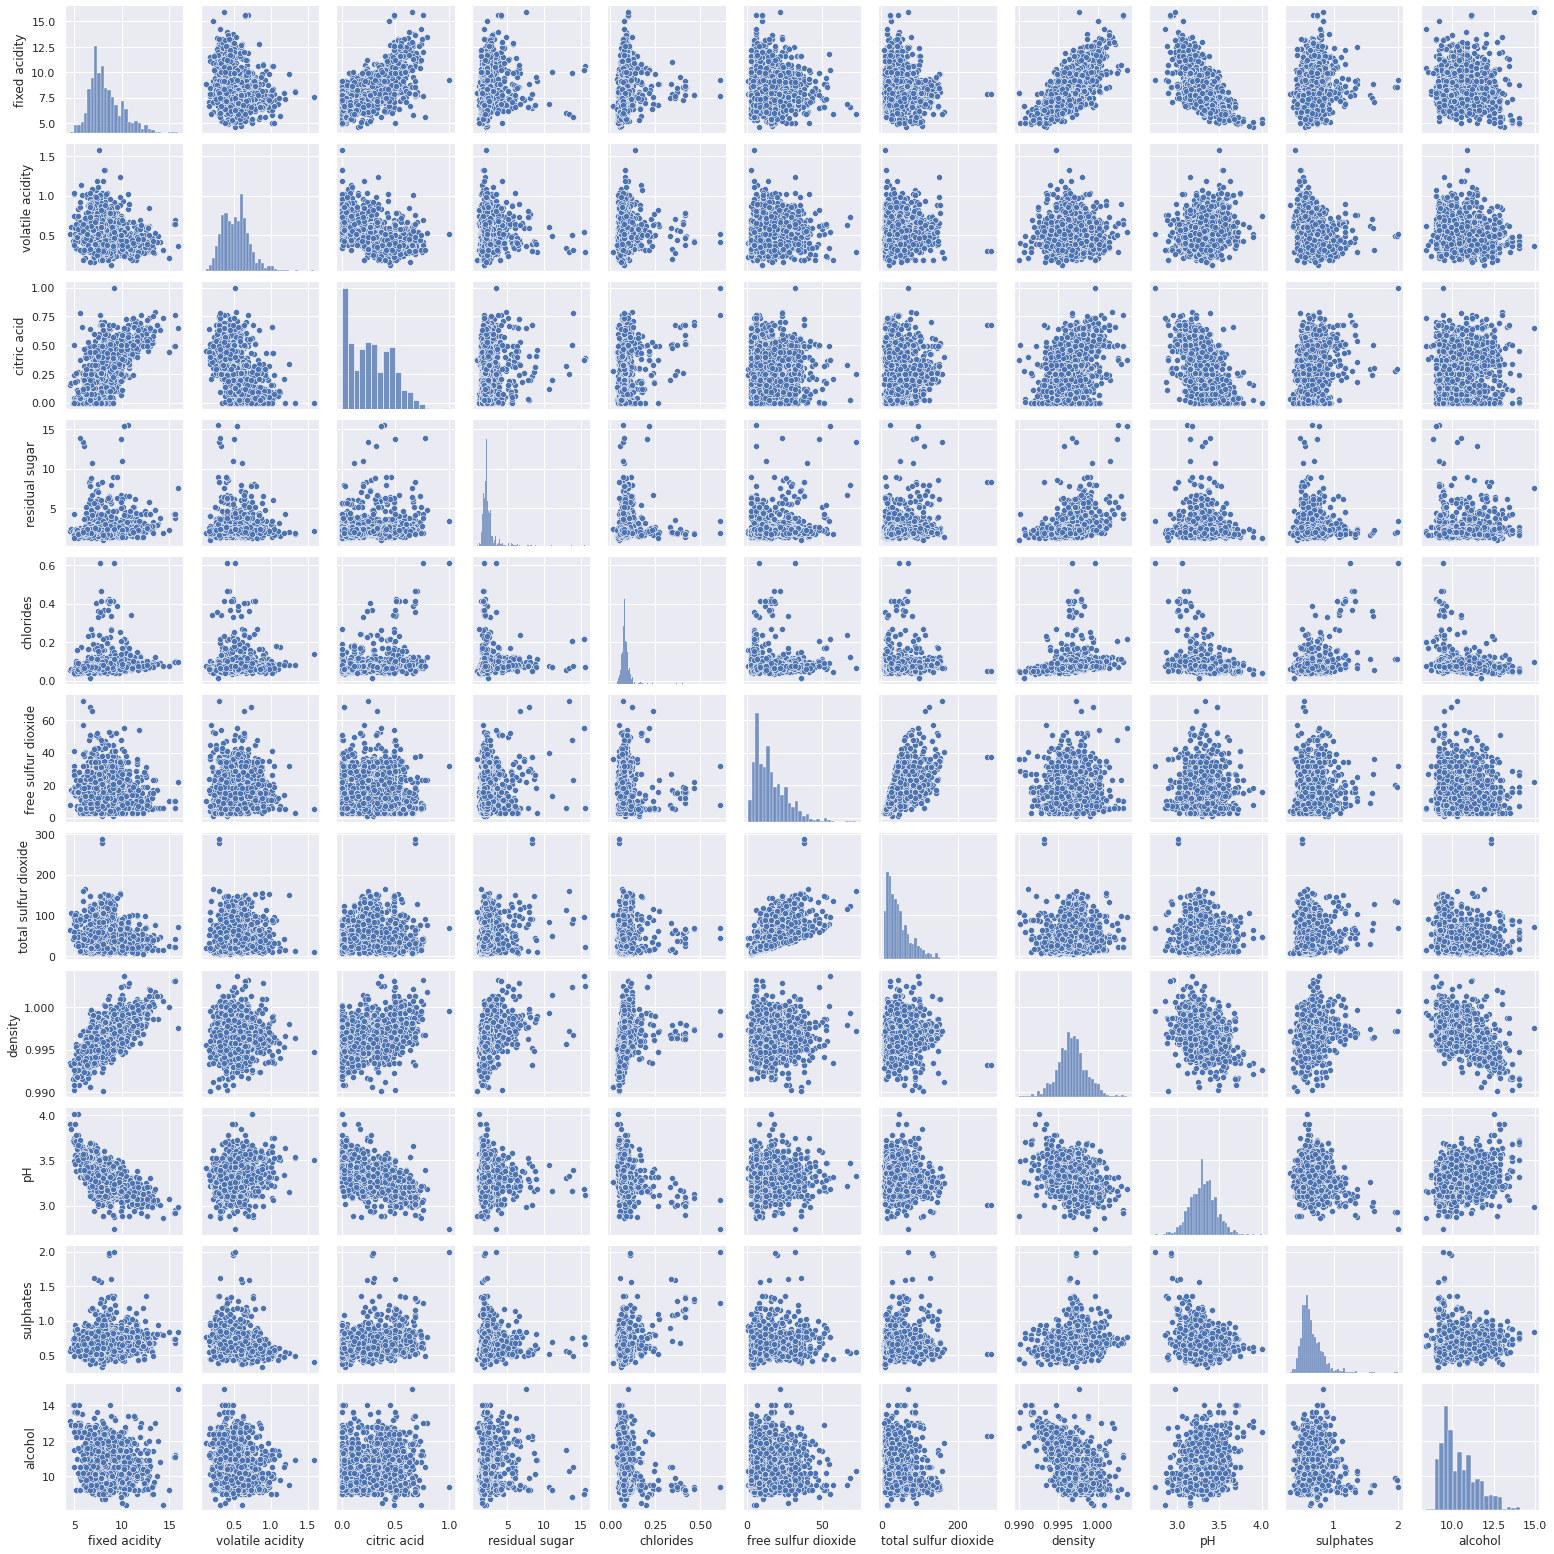

In [ ]:
sns.pairplot(dataset,height=2);

### 4. Acidity Features

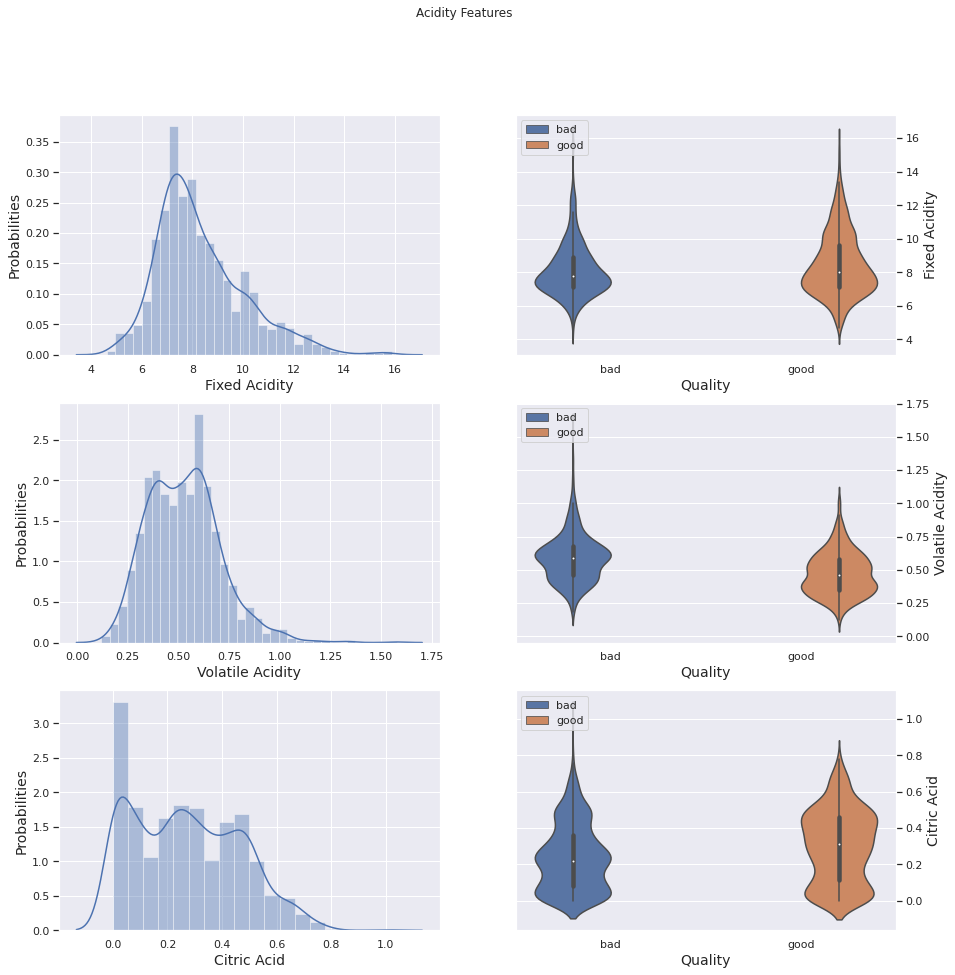

In [ ]:
f, axes = plt.subplots(3,2,figsize=(15,15))

sns.distplot(dataset['fixed acidity'], ax = axes[0][0])
axes[0][0].set_xlabel('Fixed Acidity', fontsize=14)
axes[0][0].set_ylabel('Probabilities', fontsize=14)
axes[0][0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'fixed acidity', data = dataset, hue = 'quality',ax = axes[0][1])
axes[0][1].set_xlabel('Quality', fontsize=14)
axes[0][1].set_ylabel('Fixed Acidity', fontsize=14)
axes[0][1].yaxis.tick_right()
axes[0][1].legend(loc='upper left')
axes[0][1].yaxis.set_label_position("right")

sns.distplot(dataset['volatile acidity'], ax = axes[1][0])
axes[1][0].set_xlabel('Volatile Acidity', fontsize=14)
axes[1][0].set_ylabel('Probabilities', fontsize=14)
axes[1][0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = dataset, hue = 'quality',ax = axes[1][1])
axes[1][1].set_xlabel('Quality', fontsize=14)
axes[1][1].set_ylabel('Volatile Acidity', fontsize=14)
axes[1][1].yaxis.tick_right()
axes[1][1].yaxis.set_label_position("right")
axes[1][1].legend(loc='upper left')

sns.distplot(dataset['citric acid'], ax = axes[2][0])
axes[2][0].set_xlabel('Citric Acid', fontsize=14)
axes[2][0].set_ylabel('Probabilities', fontsize=14)
axes[2][0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'citric acid', data = dataset, hue = 'quality',ax = axes[2][1])
axes[2][1].set_xlabel('Quality', fontsize=14)
axes[2][1].set_ylabel('Citric Acid', fontsize=14)
axes[2][1].yaxis.tick_right()
axes[2][1].yaxis.set_label_position("right")
axes[2][1].legend(loc='upper left')

plt.suptitle('Acidity Features')

plt.show()

### 5. Residual Sugar Feature 

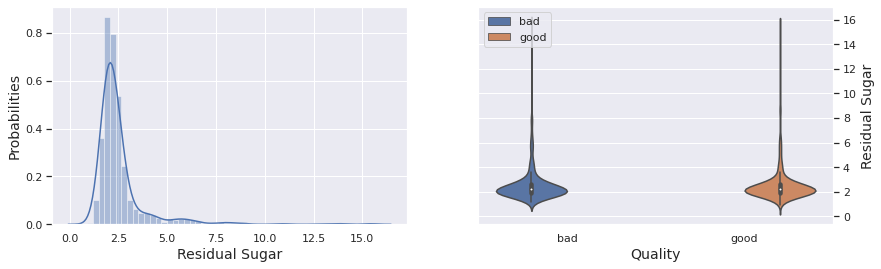

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=14)
axes[0].set_ylabel('Probabilities', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Residual Sugar', fontsize=14)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

plt.legend(loc='upper left')
plt.show()

### 6. Sulfur Dioxide Features 

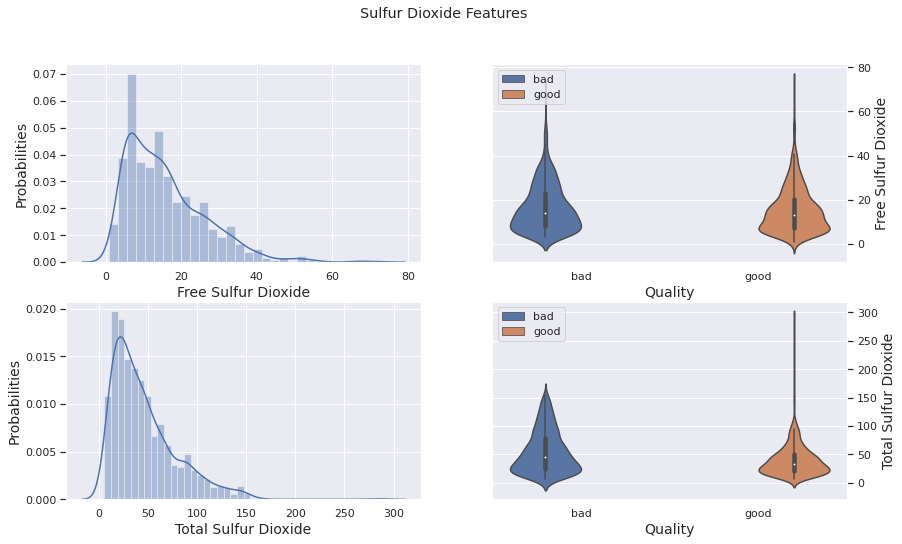

In [ ]:
f, axes = plt.subplots(2,2,figsize=(14,8))

sns.distplot(dataset['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes[0,0].set_ylabel('Probabilities', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=14)
axes[0,1].yaxis.tick_right()
axes[0,1].legend(loc='upper left')
axes[0,1].yaxis.set_label_position("right")

sns.distplot(dataset['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes[1,0].set_ylabel('Probabilities', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=14)
axes[1,1].yaxis.tick_right()
axes[1,1].legend(loc='upper left')
axes[1,1].yaxis.set_label_position("right")

plt.suptitle('Sulfur Dioxide Features')
plt.show()

### 7. Density Feature

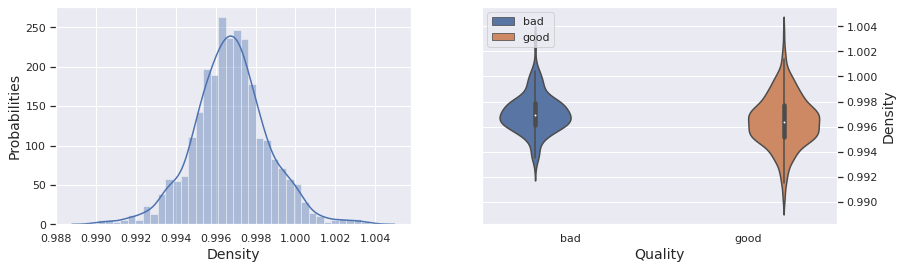

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Probabilities', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.legend(loc='upper left')
plt.show()

### 8. pH Feature

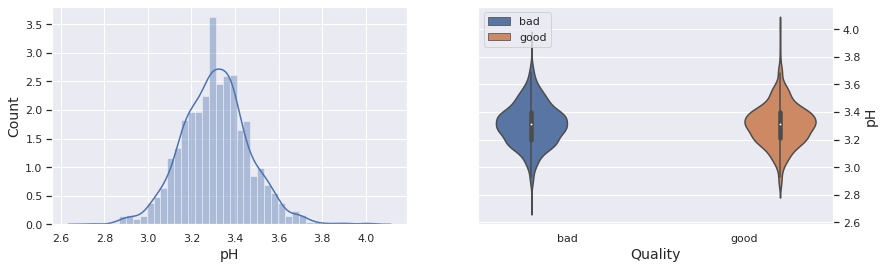

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

plt.legend(loc='upper left')
plt.show()

### 9. Sulphates Feature

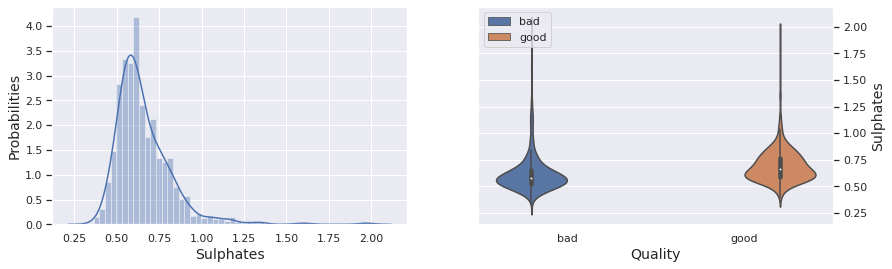

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=14)
axes[0].set_ylabel('Probabilities', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulphates', fontsize=14)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

plt.legend(loc='upper left')
plt.show()

### 10. Chlorides Feature

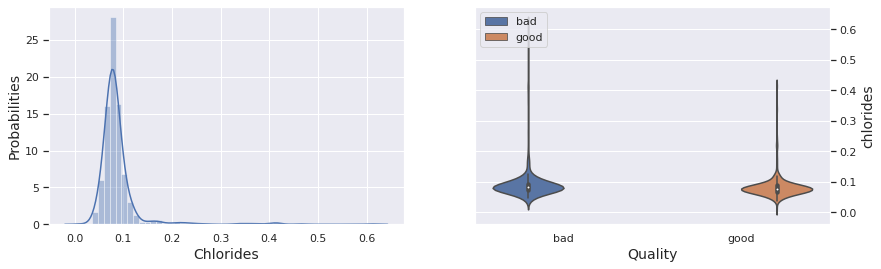

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=14)
axes[0].set_ylabel('Probabilities', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('chlorides', fontsize=14)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

plt.legend(loc='upper left')
plt.show()

## Train Test Split 

In [ ]:
# Encode data quality 
dataset['quality'] =(dataset['quality']=='good').astype(int)

# Divide the data between features and target 
X = dataset.drop(columns=['quality'])
y = dataset.quality 
features = X.columns 

X = X.to_numpy()
y = y.to_numpy()

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scale the data 

In [ ]:
# Scale the data
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

## Modeling 

### 1. Random Forest Classifier 

In [ ]:
_ = RF_classification(X_train, y_train, X_test, y_test, show=True)

Best Validation Score: 0.7980821588725175
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 30}
Accuracy on test data: 0.792
Precision on test data: 0.817
Recall on test data: 0.805
F1-score on test data: 0.811


### 2. Gradient Boosting Classifier 

In [ ]:
GB_classification(X_train, y_train, X_test, y_test)

Best Validation Score: 0.781105861627162
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 75}
Accuracy on test data: 0.792
Precision on test data: 0.813
Recall on test data: 0.813
F1-score on test data: 0.813


### 3. Neural Network Classifer 

In [ ]:
NN_classification(X_train, y_train, X_test, y_test)

Epoch 1/30
56/56 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.7382
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7641
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7784
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7828
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7748
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7918
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7891
Epoch 8/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7998
Epoch 9/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8052
Epoch 10/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7971
Epoch 11/30
56/56 [

## Feature Extraction 

### 1. Similarity Based Features: Fisher Score 

Time to finish:  13.47730565071106 seconds


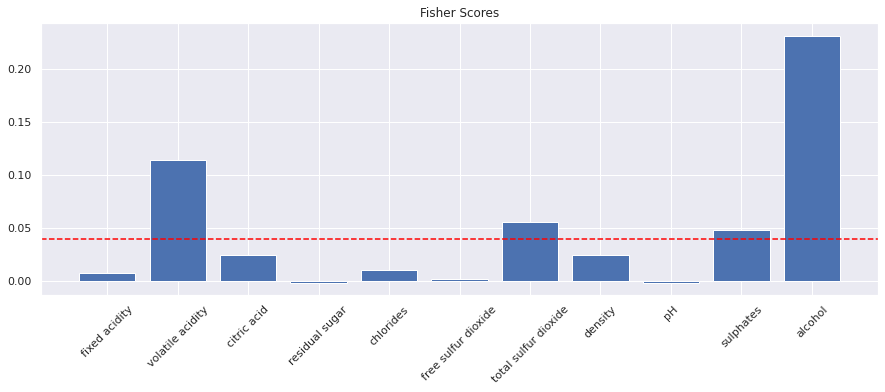

In [ ]:
start_time = time.time()
W_FS = fisher_score(X,y)
end_time = time.time()

print('Time to finish: ', end_time - start_time , 'seconds')

th = 0.04

plt.figure(figsize=(15,5))
plt.title('Fisher Scores')
plt.bar(features, W_FS)
plt.axhline(y=th, color= 'red',linestyle='--')
plt.xticks(rotation=45)
plt.show()

X_FS = X[:,np.where(W_FS>th)[0]]

# Train test split 
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y, test_size=0.3, random_state=42)

# Scale the data
stdsc = StandardScaler()
X_train_FS = stdsc.fit_transform(X_train_FS)
X_test_FS = stdsc.transform(X_test_FS)

In [ ]:
print('- Random Forest:')
_ = RF_classification(X_train_FS, y_train_FS, X_test_FS, y_test_FS, show=True)

- Random Forest:
Best Validation Score: 0.799867873158232
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 40}
Accuracy on test data: 0.804
Precision on test data: 0.842
Recall on test data: 0.798
F1-score on test data: 0.819


In [ ]:
print('- Gradient Boosting:')
GB_classification(X_train_FS, y_train_FS, X_test_FS, y_test_FS)

- Gradient Boosting:
Best Validation Score: 0.7730581358103781
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 20}
Accuracy on test data: 0.794
Precision on test data: 0.813
Recall on test data: 0.816
F1-score on test data: 0.815


In [ ]:
print('- Neural Network:')
NN_classification(X_train_FS, y_train_FS, X_test_FS, y_test_FS)

- Neural Network:
Epoch 1/30
56/56 [==============================] - 1s 1ms/step - loss: 0.5702 - accuracy: 0.7382
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7507
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7489
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7623
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7605
Epoch 6/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.7587
Epoch 7/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7676
Epoch 8/30
56/56 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7641
Epoch 9/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7748
Epoch 10/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7694
E

### 2. Information Theoretical Based Features 

#### 2.1 MIM 

Time to finish:  0.023630619049072266 seconds


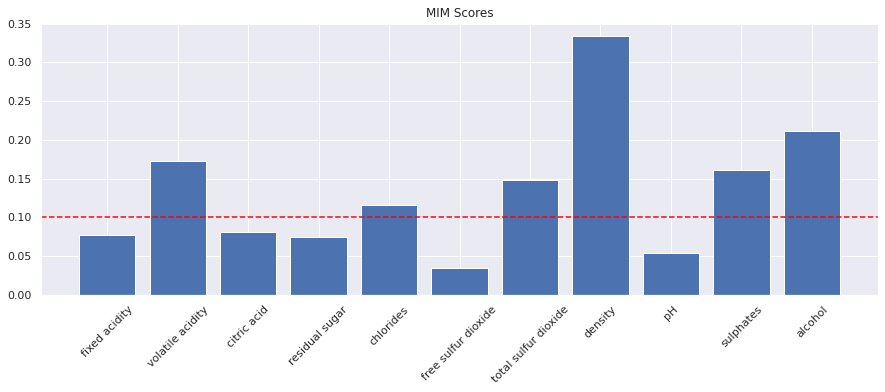

In [ ]:
start_time = time.time()
W_mi = MIM(X, y)
end_time = time.time()

print('Time to finish: ', end_time - start_time,'seconds')

th = 0.1

plt.figure(figsize=(15,5))
plt.title('MIM Scores')
plt.bar(features, W_mi)
plt.axhline(y=th, color= 'red',linestyle='--')
plt.xticks(rotation=45)
plt.show()

X_mi = X[:,np.where(W_mi>th)[0]]

# Train test split 
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi, y, test_size=0.3, random_state=42)

# Scale the data
stdsc = StandardScaler()
X_train_mi = stdsc.fit_transform(X_train_mi)
X_test_mi = stdsc.transform(X_test_mi)

In [ ]:
print('- Random Forest:')
_ = RF_classification(X_train_mi, y_train_mi, X_test_mi, y_test_mi, show=True)

- Random Forest:
Best Validation Score: 0.8025464445868034
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}
Accuracy on test data: 0.802
Precision on test data: 0.823
Recall on test data: 0.82
F1-score on test data: 0.822


In [ ]:
print('- Gradient Boosting:')
GB_classification(X_train_mi, y_train_mi, X_test_mi, y_test_mi)

- Gradient Boosting:
Best Validation Score: 0.7784152786675208
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 75}
Accuracy on test data: 0.796
Precision on test data: 0.814
Recall on test data: 0.82
F1-score on test data: 0.817


In [ ]:
print('- Neural Network:')
NN_classification(X_train_mi, y_train_mi, X_test_mi, y_test_mi)

- Neural Network:
Epoch 1/30
56/56 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7203
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.7587
Epoch 3/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7605
Epoch 4/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7712
Epoch 5/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7757
Epoch 6/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7775
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7766
Epoch 8/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7730
Epoch 9/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7802
Epoch 10/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7837
E

#### 2.2 MIFS

In [ ]:
beta_list = np.arange(0.1,1.05,0.05)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for beta in tqdm(beta_list):
  slected_features_score , slected_features_idx = MIFS(X, y, beta=beta)
  th = np.max(np.abs(slected_features_score))/2
  idx = np.array(slected_features_idx)[np.where(np.abs(slected_features_score)>th)[0]]
  X_mifs = X[:,idx]

  # Train test split 
  X_train_mifs, X_test_mifs, y_train_mifs, y_test_mifs = train_test_split(X_mifs, y, test_size=0.3, random_state=42)
  
  # Scale the data
  stdsc = StandardScaler()
  X_train_mifs = stdsc.fit_transform(X_train_mifs)
  X_test_mifs = stdsc.transform(X_test_mifs)

  # Perform classification task
  accuracy, precision, recall, f1s = RF_classification(X_train_mifs, y_train_mifs, X_test_mifs, y_test_mifs, show=False)
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  recall_list.append(recall)
  f1_score_list.append(f1s)

dd_accuracy = pd.DataFrame(accuracy_list, index=beta_list, columns = ['Accuracy'])
dd_precision = pd.DataFrame(precision_list, index=beta_list, columns = ['Precision'])
dd_recall = pd.DataFrame(recall_list, index=beta_list, columns = ['Recall'])
dd_f1_score = pd.DataFrame(f1_score_list, index=beta_list, columns = ['F1_score'])

fig = make_subplots(rows=2,cols=2, subplot_titles=['Accuracy in function of beta','Precision in function of beta', 'Recall in function of beta', 'F1-score in function of beta' ])
fig.add_trace(go.Scatter(x=dd_accuracy.index, y=dd_accuracy.Accuracy, marker={'color':'#496595'}, mode='lines'), row=1, col=1)
fig.add_trace(go.Scatter(x=dd_precision.index, y=dd_precision.Precision, marker={'color':'#496595'}, mode='lines'), row=1, col=2)
fig.add_trace(go.Scatter(x=dd_recall.index, y=dd_recall.Recall, marker={'color':'#496595'}, mode='lines'), row=2, col=1)
fig.add_trace(go.Scatter(x=dd_f1_score.index, y=dd_f1_score.F1_score, marker={'color':'#496595'}, mode='lines'), row=2, col=2)

beta_list = list(beta_list)
beta_best = beta_list[np.argmax(f1_score_list)]
fig.add_vline(x=beta_best, line_width=3, line_dash="dash", line_color="red", row=1,col=1)
fig.add_vline(x=beta_best, line_width=3, line_dash="dash", line_color="red", row=1,col=2)
fig.add_vline(x=beta_best, line_width=3, line_dash="dash", line_color="red", row=2,col=1)
fig.add_vline(x=beta_best, line_width=3, line_dash="dash", line_color="red", row=2,col=2)

fig.update_xaxes(title_text='beta', row=1, col=1)
fig.update_xaxes(title_text='beta', row=1, col=2)
fig.update_xaxes(title_text='beta', row=2, col=1)
fig.update_xaxes(title_text='beta', row=2, col=2)

fig.update_layout(showlegend=False)
fig.show()

  0%|          | 0/19 [00:00<?, ?it/s]

Time to finish:  0.1616060733795166 seconds


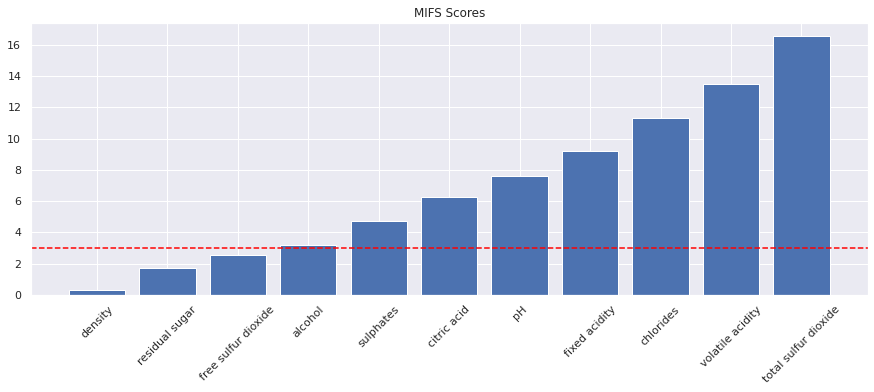

In [ ]:
start_time = time.time()
slected_features_score , slected_features_idx = MIFS(X, y, beta=beta_best)
end_time = time.time()

print('Time to finish: ', end_time - start_time, 'seconds')

th = 3

plt.figure(figsize=(15,5))
plt.title('MIFS Scores')
plt.bar(features[slected_features_idx], np.abs(slected_features_score))
plt.axhline(y=th, color= 'red',linestyle='--')
plt.xticks(rotation=45)
plt.show()

idx = np.array(slected_features_idx)[np.where(np.abs(slected_features_score)>th)[0]]
X_mifs = X[:,idx]

# Train test split 
X_train_mifs, X_test_mifs, y_train_mifs, y_test_mifs = train_test_split(X_mifs, y, test_size=0.3, random_state=42)

# Scale the data
stdsc = StandardScaler()
X_train_mifs = stdsc.fit_transform(X_train_mifs)
X_test_mifs = stdsc.transform(X_test_mifs)

In [ ]:
print('- Random Forest:')
_ = RF_classification(X_train_mifs, y_train_mifs, X_test_mifs, y_test_mifs, show=True)

- Random Forest:
Best Validation Score: 0.7569746957078796
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}
Accuracy on test data: 0.806
Precision on test data: 0.82
Recall on test data: 0.835
F1-score on test data: 0.827


In [ ]:
print('- Random Forest:')
_ = RF_classification(X_train_mifs, y_train_mifs, X_test_mifs, y_test_mifs, show=True)

- Random Forest:
Best Validation Score: 0.7971893017296605
Best params: {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
Accuracy on test data: 0.812
Precision on test data: 0.839
Recall on test data: 0.82
F1-score on test data: 0.83


In [ ]:
print('- Gradient Boosting:')
GB_classification(X_train_mifs, y_train_mifs, X_test_mifs, y_test_mifs)

- Gradient Boosting:
Best Validation Score: 0.7748478539397823
Best params: {'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 100}
Accuracy on test data: 0.815
Precision on test data: 0.845
Recall on test data: 0.816
F1-score on test data: 0.83


In [ ]:
print('- Neural Network:')
NN_classification(X_train_mifs, y_train_mifs, X_test_mifs, y_test_mifs)

- Neural Network:
Epoch 1/30
56/56 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7274
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7480
Epoch 3/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7703
Epoch 4/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7730
Epoch 5/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7685
Epoch 6/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7721
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7775
Epoch 8/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7900
Epoch 9/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7900
Epoch 10/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7909
E

## Final Results




* **Accuracy:**
<center>

|$Accuracy$|w/o Feature Selection| Fisher Score | MIM | MIFS |
|---|---|---|---|---|
Random Forest | <center>$0.792$<center>| <center>$\underline{0.804}$<center> | <center>$0.802$<center>| <center>$\bf{0.812}$<center> |
Gradient Boosting | <center>$0.792$<center> | <center>$0.794$<center> | <center>$\underline{0.796}$<center> | <center>$\bf{0.815}$<center> |
Neural Network | <center>$\underline{0.752}$<center> | <center>$0.721$ <center> | <center> $0.723$ <center> | <center> $\bf{0.769}$ <center> |
<br><br>



* **Precision:**
<center>

|$Precision$|w/o Feature Selection| Fisher Score | MIM | MIFS |
|---|---|---|---|---|
Random Forest | <center>$0.817$<center>| <center>$\bf{0.842}$<center> | <center>$0.823$<center>| <center>$\underline{0.839}$<center> |
Gradient Boosting | <center>$0.813$<center> | <center>$0.813$<center> | <center>$\underline{0.814}$<center> | <center>$\bf{0.845}$<center> |
Neural Network | <center>$0.772$<center> | <center>$\underline{0.801}$<center> | <center>$0.782$<center> | <center>$\bf{0.842}$<center> |
<br><br>

* **Recall:**
<center>

|$Recall$|w/o Feature Selection| Fisher Score | MIM | MIFS |
|---|---|---|---|---|
Random Forest | <center>$0.805$<center>| <center>$0.798$<center> | <center>$\bf{0.82}$<center>| <center>$\bf{0.82}$<center> |
Gradient Boosting | <center>$0.813$<center> | <center>$0.816$<center> | <center>$\bf{0.82}$<center> | <center>$\underline{0.816}$<center> |
Neural Network | <center>$\bf{0.787}$<center> | <center>$0.663$<center> | <center>$0.697$<center> | <center>$\underline{0.719}$<center> |
<br><br>

* **F1-score:**
<center>

|$f1-score$|w/o Feature Selection| Fisher Score | MIM | MIFS |
|---|---|---|---|---|
Random Forest | <center>$0.811$<center>| <center>$0.819$<center> | <center>$\underline{0.822}$<center>| <center>$\bf{0.83}$<center> |
Gradient Boosting | <center>$0.813$<center> | <center>$0.815$<center> | <center>$\underline{0.817}$<center> | <center>$\bf{0.83}$<center> |
Neural Network | <center>$\bf{0.779}$<center> | <center>$0.725$<center> | <center>$0.737$<center> | <center>$\underline{0.776}$<center> |
<br><br>

* **Time to finish:**
<center>

||Time to finish (seconds) |
|---|---|
FS| <center>$13.477$<center>|
MIM | <center>$\bf{0.0236}$<center> | 
MIFS | <center>$\underline{0.1616}$<center> | 